You don't have to code anything here, just read and follow along. You will need to process `hdf5` files in the binomial logistic regression notebook.

# Reading and Writing `hdf5` Files

Most of the time, your data will be in separate files which will be stored in separate spaces in your memory (especially true for image data). This is not efficient since we have to load the data one by one during training. A better way is to store all the data into one file so they are mapped in a contiguous space in the memory. However, this will pose another problem when your data is too big to fit in your memory. Memory mapped file systems / databases such as HDF5 addresses this problem by directly reading data from your storage and only loading the data you are currently reading into memory. It also provides a seemless interface that works as if you are working with a giant matrix. 

**In this notebook, you will learn to:**
- Write data into an hdf5 file
    - store (multiple) data sets in one hdf5 file
- Read data from an hdf5 file.

## Instructions
* You may not reproduce this notebook or share them to anyone.

## Installing the `h5py` and `pillow` packages

Don't forget to install the `h5py` package and `Pillow` to read and write images.

- `pip install Pillow`
- `pip install h5py`

In [1]:
import os
import h5py
import imageio
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

%matplotlib inline

C:\Users\Admin\AppData\Local\Temp\ipykernel_33956\1930961405.py:5: DeprecationWarning: scipy.misc is deprecated and will be removed in 2.0.0
  from scipy import misc


## Dataset

For this exercise, we will be working with $64 \times 64$ images stored as separate `png` files in the `cat_train` and `cat_test` folders. If you do not have the `cat_train` and `cat_test` folders, kindly extract these folders in the `cat.zip` file. The folders also include a text file (`labels.txt`) that encodes the ground truth labels for each image.

In [2]:
train_path = 'cat_train'
test_path = 'cat_test'

# get the list of file names in each folder
train_filenames = []
files = sorted(os.listdir(train_path))
for file in files:
    if file.endswith('.png'):
        train_filenames.append('/'.join([train_path, file]))
        
test_filenames = []
files = sorted(os.listdir(test_path))
for file in files:
    if file.endswith('.png'):
        test_filenames.append('/'.join([test_path, file]))

Display the number of images in the train and test sets.

In [3]:
num_train = len(train_filenames)
num_test = len(test_filenames)

print('Number of train images =', num_train)
print('Number of test images =', num_test)

Number of train images = 209
Number of test images = 50


## Create `hdf5` file

Create a blank `hdf5` file. You can think of this as a dictionary which can store data referenced/indexed by keys.

In [4]:
file_name = 'cat_dataset.hdf5'
save_file = h5py.File(file_name, 'w')

The `create_dataset()` function adds keys to your `hdf5` file. The important parameters are:
- Name of the key
- Shape of the dataset - for images, it is usually in the `(N, H, W, C)` format, where `N` is the number of images, `H` is the height in pixels, `W` is the width in pixels, and `C` is the number of channels (which is set to 3 for colored images represented in RGB).
- Data type

## Store train images in the `hdf5` file

Let's use `train_x` as key to store the train images and `train_y` to store the train labels.

In [5]:
image_height = 64
image_width = 64

# create datasets for the train images and labels
train_images = save_file.create_dataset('train_x', shape=(num_train, image_height, image_width, 3), dtype='float32')
train_labels = save_file.create_dataset('train_y', shape=(num_train, 1), dtype='int32')

Using the `imageio.imread()` function, read the train images stored in the folder `cat_train`. Normalize the images to `[0, 1]` by dividing the pixel values by 255 and store it in the `hdf5` file under the `train_x` key.

In [6]:
for i in range(num_train):
    image = imageio.imread(train_filenames[i])
    train_images[i] = image / 255. 

C:\Users\Admin\AppData\Local\Temp\ipykernel_33956\1915285105.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(train_filenames[i])


Randomly read data to check if the write operation was successful.

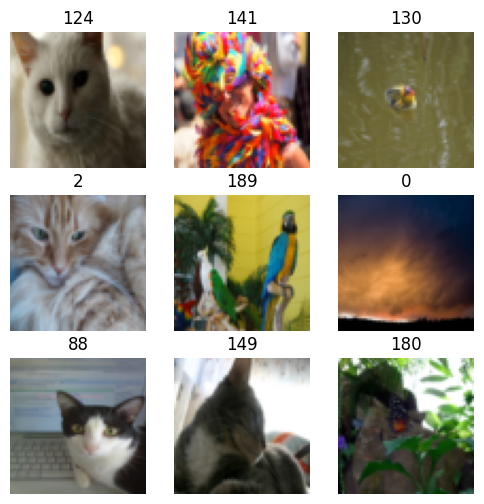

In [7]:
random_index = np.arange(num_train)
np.random.shuffle(random_index)
plt.figure(figsize=(6, 6))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[random_index[i]])
    plt.axis('off')
    plt.title(random_index[i])

## Store test images in the `hdf5` file

Let's use `test_x` as key to store the train images and `test_y` to store the train labels.

In [8]:
test_images = save_file.create_dataset('test_x', shape=(num_test, image_height, image_width, 3), dtype='float32')
test_labels = save_file.create_dataset('test_y', shape=(num_test, 1), dtype='int32')

Using the `imageio.imread()` function, read the test images stored in the folder `cat_test`. Normalize the images to `[0, 1]` by dividing the pixel values by 255 and store it in the `hdf5` file under the `test_x` key.

In [9]:
for i in range(num_test):
    image = imageio.imread(test_filenames[i])
    test_images[i] = image / 255.

C:\Users\Admin\AppData\Local\Temp\ipykernel_33956\3244457204.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(test_filenames[i])


Randomly read data to check if the write operation was successful.

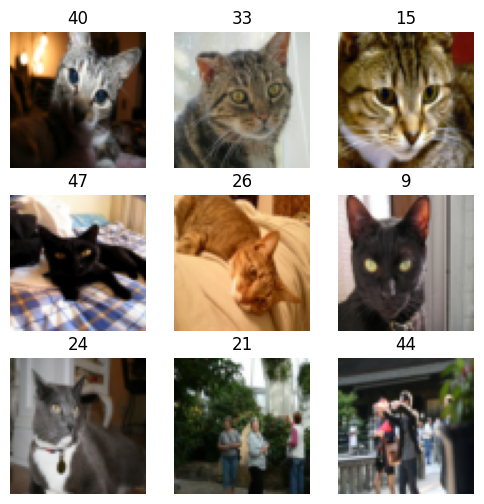

In [10]:
random_index = np.arange(num_test)
np.random.shuffle(random_index)
plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[random_index[i]])
    plt.axis('off')
    plt.title(random_index[i])

## Read and store the labels of the train and test images in the `hdf5` file

Read the corresponding labels for the train and test images. Labels of the train images are stored as `train_y`, while labels of the test images are stored as `test_y`.

In [11]:
with open(train_path + '/labels.txt','r') as file:
    i = 0
    for l in file:
        train_labels[i] = int(l)
        i += 1
        
with open(test_path + '/labels.txt','r') as file:
    i = 0
    for l in file:
        test_labels[i] = int(l)
        i += 1

Close the `hdf5` file writer.

In [12]:
save_file.close()

## Read `hdf5` file that you just created

Open the `hdf5` file in read mode.

In [13]:
read_hdf5 = h5py.File(file_name, 'r')

Print the existing keys inside the `hdf5` file.

In [14]:
for key in read_hdf5.keys():
    print(key)

test_x
test_y
train_x
train_y


Print the shape of the train images, train labels, test images, and test labels in the `hdf5` file.

In [15]:
print('Train images shape =', read_hdf5['train_x'].shape)
print('Train labels shape =', read_hdf5['train_y'].shape)
print('Test images shape =', read_hdf5['test_x'].shape)
print('Test labels shape =', read_hdf5['test_y'].shape)

Train images shape = (209, 64, 64, 3)
Train labels shape = (209, 1)
Test images shape = (50, 64, 64, 3)
Test labels shape = (50, 1)


Randomly read and show train images stored in the `hdf5` file.

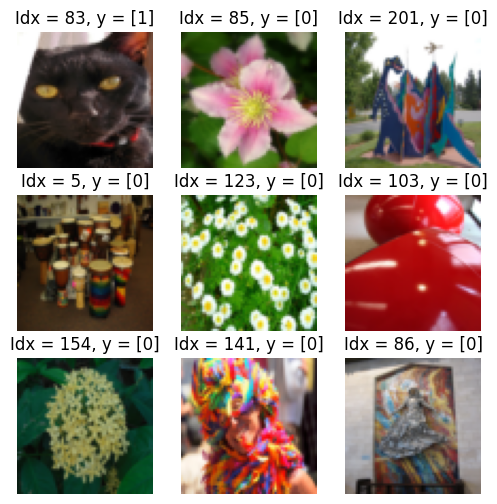

In [16]:
random_index = np.arange(num_train)
np.random.shuffle(random_index)
plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(read_hdf5['train_x'][random_index[i]])
    plt.axis('off')
    plt.title('Idx = ' + str(random_index[i]) +', y = ' + str(read_hdf5['train_y'][random_index[i]]))

Randomly read and show train images stored in the `hdf5` file.

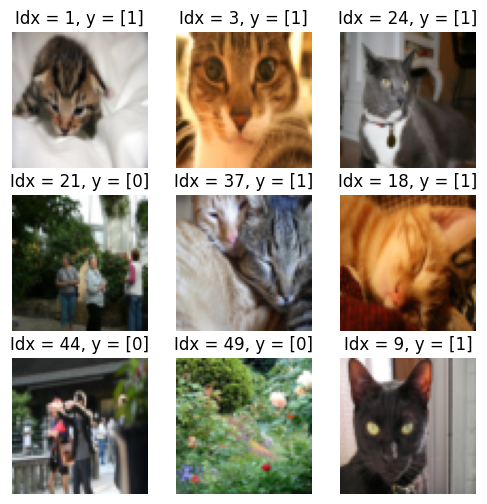

In [17]:
random_index = np.arange(num_test)
np.random.shuffle(random_index)
plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(read_hdf5['test_x'][random_index[i]])
    plt.axis('off')
    plt.title('Idx = ' + str(random_index[i]) +', y = ' + str(read_hdf5['test_y'][random_index[i]]))

Close the `hdf5` file reader.

In [18]:
read_hdf5.close()

<center><b>fin</b></center>